In [1]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('iris.csv')

In [5]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 6)

In [7]:
Species = list(set(data["Species"]))

In [8]:
S1=data[data["Species"]==Species[0]]
S2=data[data["Species"]==Species[1]]
S3=data[data["Species"]==Species[2]]

In [9]:
import matplotlib.pyplot as plt

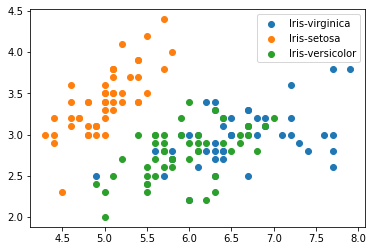

In [14]:
plt.scatter(S1["SepalLengthCm"],S1["SepalWidthCm"],label=Species[0])
plt.scatter(S2["SepalLengthCm"],S2["SepalWidthCm"],label= Species[1])
plt.scatter(S3["SepalLengthCm"],S3["SepalWidthCm"],label= Species[2])
plt.legend()

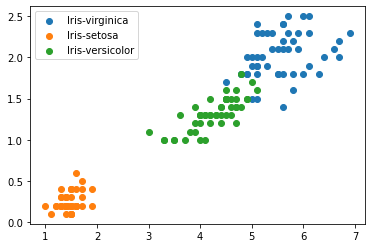

In [15]:
plt.scatter(S1["PetalLengthCm"],S1["PetalWidthCm"],label=Species[0])
plt.scatter(S2["PetalLengthCm"],S2["PetalWidthCm"],label= Species[1])
plt.scatter(S3["PetalLengthCm"],S3["PetalWidthCm"],label= Species[2])
plt.legend()

In [34]:
Req_data= data.iloc[:,1:]
Req_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
shuffle_data= np.random.permutation(Req_data.shape[0])
Req_data = Req_data.iloc[shuffle_data]
Req_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
136,6.3,3.4,5.6,2.4,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
24,4.8,3.4,1.9,0.2,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa


In [36]:
train_size = int(Req_data.shape[0]*0.7)

In [46]:
train_df = Req_data.iloc[:train_size,:]
test_df = Req_data.iloc[train_size:,:]
train= train_df.values
test= test_df.values
y_true = test[:,-1]

## 1 Measure distance 
## 2 Get nearest neighbour
## 3 Predict Classfier

In [47]:
from math import sqrt


In [48]:
def E_dis(X,Y):
    distance = 0
    for i in range(len(X)-1):
        distance += ((X[i]-Y[i])**2)
    return sqrt(distance)    

In [54]:
def get_neighbour(Query,train,neighbour):
    distance=[]
    D=[]
    for i in train:
        distance.append(E_dis(Query,i))
        D.append(i)
    distances=np.array(distance)
    D=np.array(D)
    sort_indexes=distances.argsort()
    D=D[sort_indexes]
    return D[:neighbour]

In [58]:
def prediction(Query, train, neighbour):
    classes=[]
    neighbours= get_neighbour(Query,train,neighbour)
    for i in neighbours:
        classes.append(i[-1])
    predicted = max(classes, key=classes.count)
    
    return predicted
    

In [59]:
def accuracy(yt, yp):
    num=0
    for i in range(len(yt)):
        if yt[i]==yp[i]:
            num+=1
    return num/len(yt)
            

In [62]:
y_pred=[]
for i in test:
    y_pred.append(prediction(i,train,6))

In [63]:
accuracy(y_true,y_pred)

0.9111111111111111

In [72]:
x=range(1,200)
y=[]
for i in x:
    y_pred=[]
    for k in test:
        y_pred.append(prediction(k,train,i))
    y.append(accuracy(y_true,y_pred))

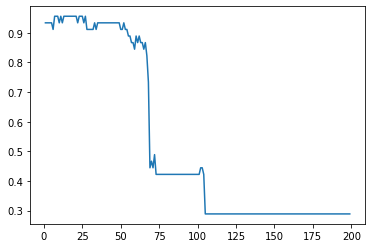

In [73]:
plt.plot(x,y)